### Optimum K değeri Hesaplama Yöntemleri

**Dirsek Metodu:**

K=1 den K=n ye kadar sürekli yenilenir. n: Bizim problem gereksinimlerimize göre belirediğimiz
bir hiper parametredir.

Her bir k değeri için küme merkezleri arasındaki mesafenin kareleri toplamı hesaplanır. ( WCSS )

WCSS değerlerinin bir grafiği çizdirilir. Bu grafik dirsek şeklinde görünür.

Bu noktada k=1 den başladığıdında WCSS maks değere sahiptir. K değeri arttıkça WCSS düşmeye başlar.
Sonrasında WCSS değeri grafik üzerinde düz çizgi belirtmeye başladığında Optimum K değeri belirlenmiş olur.




In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

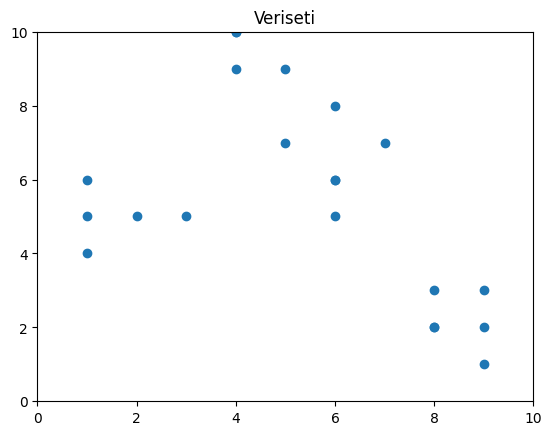

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,\
              7,8,9,8,9,9,8,4,4,5,4])
x2 = np.array([5,4,5,5,6,5,8,6,7,6,7, \
              2,1,2,3,2,3,9,10,9,10])

X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Veriseti')
plt.scatter(x1, x2)
plt.show()

In [4]:
bozulma = []
atalet = []
map1 = {}
map2 = {}
#Bozulma = 1/n * toplam(uzaklık(nokta, ağırlık merkezleri)^2)
#Atalet = toplam(uzaklık(nokta,ağırlık merkezleri)^2)

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X) #model oluşturma
    kmeanModel.fit(X) #modeli eğitme
    bozulma.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_ , 'euclidean'),axis=1))/X.shape[0])
    atalet.append(kmeanModel.inertia_)
    map1[k]=sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0]
    map2[k]= kmeanModel.inertia_

for key, val in map1.items():
    print(f'{key} : {val}')

1 : 3.4475489368765606
2 : 2.118732796090454
3 : 1.3243285881358255
4 : 0.8733796436558107
5 : 0.7720518879071977
6 : 0.6895575661006206
7 : 0.6358032177504376
8 : 0.5594335807240569
9 : 0.4917136046522508


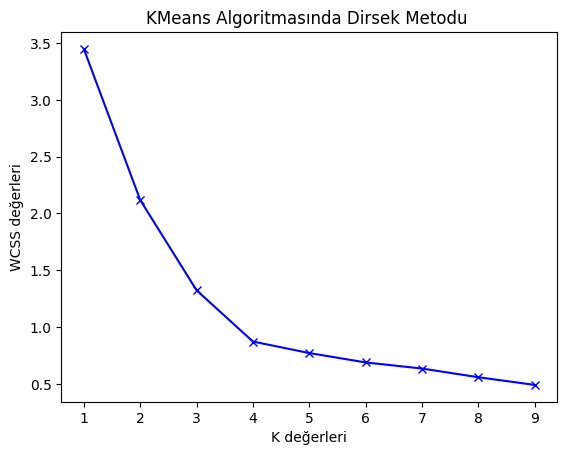

In [5]:
plt.plot(K,bozulma, 'bx-')
plt.xlabel('K değerleri')
plt.ylabel('WCSS değerleri')
plt.title('KMeans Algoritmasında Dirsek Metodu ')
plt.show()